In [2]:
# Declare Dependencies
import glob, os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pymysql
pymysql.install_as_MySQLdb()
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

In [2]:
#Store CSV into a dataframe
csv_file = "Resources/SpotifyAudioFeaturesNov2018.csv"
tracks_data_df = pd.read_csv(csv_file)
tracks_data_df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [3]:
# We create a new Dataframe with selected columns to perform our analysis
new_track_data_df = tracks_data_df[['track_id', 'artist_name', 'track_name', 'danceability', 'energy', 
                                    'liveness', 'loudness', 'popularity' ]].copy()
new_track_data_df.head()

,track_id,artist_name,track_name,danceability,energy,liveness,loudness,popularity
0,2RM4jf1Xa9zPgMGRDiht8O,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.743,0.339,0.0812,-7.678,44
1,1tHDG53xJNGsItRA3vfVgs,YG,BAND DRUM (feat. A$AP Rocky),0.846,0.557,0.2860,-7.259,10
2,6Wosx2euFPMT14UXiWudMy,R3HAB,Radio Silence,0.603,0.723,0.0824,-5.890,63
3,3J2Jpw61sO7l6Hc7qdYV91,Chris Cooq,Lactose,0.800,0.579,0.0994,-12.118,9
4,2jbYvQCyPgX3CdmAzeVeuS,Chris Cooq,Same - Original mix,0.783,0.792,0.0332,-10.277,8


In [4]:
# Clean the data by dropping duplicates and setting the index
new_track_data_df.drop_duplicates("track_id", inplace=True)
new_track_data_df.set_index("track_id", inplace=True)

new_track_data_df.head()

,artist_name,track_name,danceability,energy,liveness,loudness,popularity
track_id,,,,,,,
2RM4jf1Xa9zPgMGRDiht8O,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.743,0.339,0.0812,-7.678,44
1tHDG53xJNGsItRA3vfVgs,YG,BAND DRUM (feat. A$AP Rocky),0.846,0.557,0.2860,-7.259,10
6Wosx2euFPMT14UXiWudMy,R3HAB,Radio Silence,0.603,0.723,0.0824,-5.890,63
3J2Jpw61sO7l6Hc7qdYV91,Chris Cooq,Lactose,0.800,0.579,0.0994,-12.118,9
2jbYvQCyPgX3CdmAzeVeuS,Chris Cooq,Same - Original mix,0.783,0.792,0.0332,-10.277,8


In [5]:
#Connect to local database
connection_string = "root:Cuba@1105@localhost/spotify_db"
engine = create_engine(f'mysql://{connection_string}')

In [6]:
#Check for tables
engine.table_names()

['tracks_det']

In [1]:
#Use pandas to load csv converted DataFrame into database

new_track_data_df.to_sql(name='tracks_det', con=engine, if_exists='append', index=True)

NameError: name 'new_track_data_df' is not defined

In [9]:
#Confirm data has been added by querying the tracks_det table
pd.read_sql_query('select * from tracks_det', con=engine).head()

,track_id,artist_name,track_name,danceability,energy,liveness,loudness,popularity
0,0009UBVA8DCDwk1Hepib6P,PUSSYGANGCO,Kalifornia,0.680,0.395,0.0958,-13.803,0.0
1,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,0.679,0.770,0.0825,-3.537,48.0
2,000v2QpqP2NmikGmSkLlCZ,Panchito Arredondo,Legado Del 20 (En Vivo),0.850,0.784,0.1760,-6.794,18.0
3,002i2U25IxYf1gQ7hgbVOV,1788-L,F U L L / B U R S T,0.385,0.646,0.0994,-3.985,45.0
4,002iYXHVU2wfyTtUrJFFSK,Image Sounds,Landscape,0.615,0.461,0.3030,-10.626,0.0


In [10]:
# create new dataframe df_top ordered consisting of the 100 most popular tracks
df_top = new_track_data_df.sort_values('popularity', ascending=False)
df_top.head(50)

,artist_name,track_name,danceability,energy,liveness,loudness,popularity
track_id,,,,,,,
2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",0.724,0.647,0.1020,-5.642,100
4w8niZpiMy6qz1mntFA5uM,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",0.841,0.798,0.0618,-4.206,99
116H0KvKr2Zl4RPuVBruDO,Bad Bunny,MIA (feat. Drake),0.817,0.539,0.0990,-6.349,97
2dpaYNEQHiRxtZbfNsse99,Marshmello,Happier,0.687,0.792,0.1670,-2.749,96
2xLMifQCjDGFmkHkpNLD9h,Travis Scott,SICKO MODE,0.834,0.730,0.1240,-3.714,95
7l3E7lcozEodtVsSTCkcaA,Kodak Black,ZEZE (feat. Travis Scott & Offset),0.826,0.615,0.0965,-7.979,95
5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,0.752,0.488,0.0936,-7.050,95
1A6OTy97kk0mMdm78rHsm8,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.753,0.498,0.0706,-5.610,95
2LskIZrCeLxRvCiGP8gxlh,XXXTENTACION,Arms Around You (feat. Maluma & Swae Lee),0.703,0.723,0.1260,-5.450,94


In [11]:
# show the first 10 results
df_top[['artist_name', 'track_name', 'popularity']].head(10)

,artist_name,track_name,popularity
track_id,,,
2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",100
4w8niZpiMy6qz1mntFA5uM,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",99
116H0KvKr2Zl4RPuVBruDO,Bad Bunny,MIA (feat. Drake),97
2dpaYNEQHiRxtZbfNsse99,Marshmello,Happier,96
2xLMifQCjDGFmkHkpNLD9h,Travis Scott,SICKO MODE,95
7l3E7lcozEodtVsSTCkcaA,Kodak Black,ZEZE (feat. Travis Scott & Offset),95
5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,95
1A6OTy97kk0mMdm78rHsm8,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,95
2LskIZrCeLxRvCiGP8gxlh,XXXTENTACION,Arms Around You (feat. Maluma & Swae Lee),94


In [12]:
df_top.set_index("artist_name", inplace=True)
df_top.head()

,track_name,danceability,energy,liveness,loudness,popularity
artist_name,,,,,,
Ariana Grande,"thank u, next",0.724,0.647,0.1020,-5.642,100
DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",0.841,0.798,0.0618,-4.206,99
Bad Bunny,MIA (feat. Drake),0.817,0.539,0.0990,-6.349,97
Marshmello,Happier,0.687,0.792,0.1670,-2.749,96
Travis Scott,SICKO MODE,0.834,0.730,0.1240,-3.714,95


In [13]:
toptracks = df_top.groupby('track_name')['popularity'].mean().sort_values().tail(10)

C:\Users\cmoti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


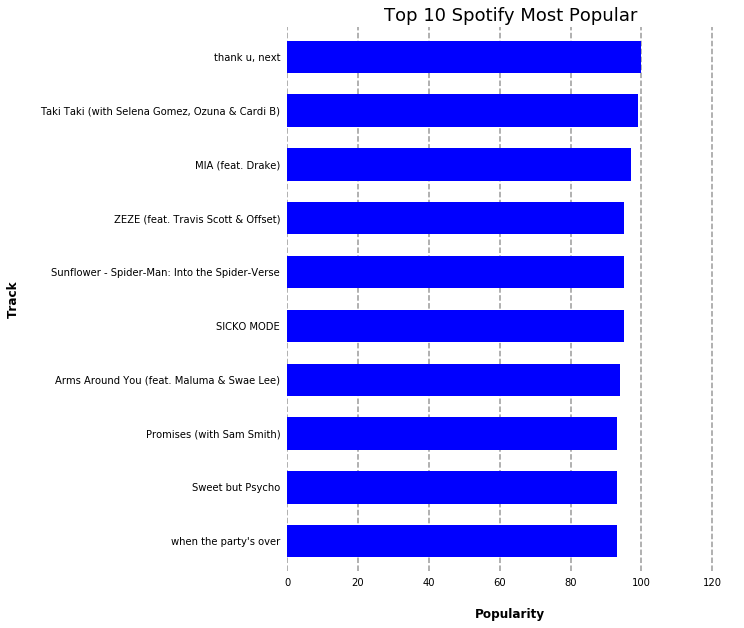

In [14]:
toptracks.plot(kind='barh')
ax = toptracks.plot(kind='barh', figsize=(8, 10), color='blue', zorder=2, width=0.60)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='black', zorder=1)

  # Set x-axis label
ax.set_xlabel("Popularity", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Track", labelpad=20, weight='bold', size=12)
 # Set the tittle
ax.set_title("Top 10 Spotify Most Popular", fontsize=18)
  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [21]:
top_artist = new_track_data_df.loc[new_track_data_df["popularity"] > 90]
top_artist.head(25)


,artist_name,track_name,danceability,energy,liveness,loudness,popularity
track_id,,,,,,,
2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",0.724,0.647,0.1020,-5.642,100
2xLMifQCjDGFmkHkpNLD9h,Travis Scott,SICKO MODE,0.834,0.730,0.1240,-3.714,95
1xzBco0xcoJEDXktl7Jxrr,Sheck Wes,Mo Bamba,0.729,0.625,0.2480,-5.266,93
7l3E7lcozEodtVsSTCkcaA,Kodak Black,ZEZE (feat. Travis Scott & Offset),0.826,0.615,0.0965,-7.979,95
5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,0.752,0.488,0.0936,-7.050,95
1A6OTy97kk0mMdm78rHsm8,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.753,0.498,0.0706,-5.610,95
0s3nnoMeVWz3989MkNQiRf,Juice WRLD,Lucid Dreams,0.511,0.566,0.3400,-7.230,93
2dpaYNEQHiRxtZbfNsse99,Marshmello,Happier,0.687,0.792,0.1670,-2.749,96
4CH66Rxcjcj3VBHwmIBj4T,XXXTENTACION,BAD!,0.772,0.493,0.1540,-3.410,91


In [41]:
top_artist_group = top_artist[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False)
top_artist_group

,popularity
artist_name,
XXXTENTACION,369
Post Malone,187
Ariana Grande,100
DJ Snake,99
Bad Bunny,97
Marshmello,96
Travis Scott,95
Kodak Black,95
Halsey,95


C:\Users\cmoti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


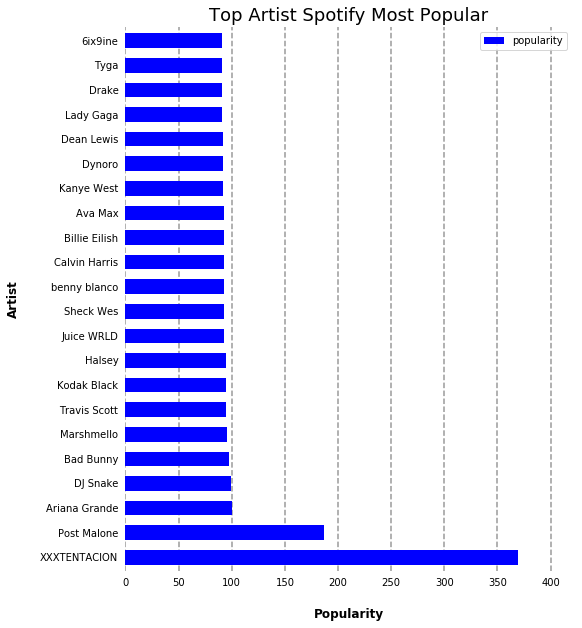

In [42]:
ax = top_artist_group.plot(kind='barh', figsize=(8, 10), color='blue', zorder=2, width=0.60)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='black', zorder=1)

  # Set x-axis label
ax.set_xlabel("Popularity", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Artist", labelpad=20, weight='bold', size=12)
 # Set the tittle
ax.set_title("Top Artist Spotify Most Popular", fontsize=18)
  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))